<a href="https://colab.research.google.com/github/salmonin-o3o/ESAA_study/blob/main/ESAA1004_exercises2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [3]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[337  20]
 [ 30 182]]


* 정확도

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9121


* 정밀도

In [5]:
precision = precision_score(y, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9010


* 재현율

In [6]:
recall = recall_score(y, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.8585


* F1 score

In [7]:
f1 = f1_score(y, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [9]:
from sklearn.preprocessing import Binarizer

y_pred_proba = model_lor.predict_proba(X)
binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.fit_transform(y_pred_proba[:, 0].reshape(-1, 1))
y_pred2 = y_pred2.flatten()
print(y_pred2)

[0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.

In [10]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
conf_matrix = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)

print("혼동 행렬:\n", conf_matrix)
print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 스코어:", f1)


혼동 행렬:
 [[  1 356]
 [139  73]]
정확도: 0.13005272407732865
정밀도: 0.17016317016317017
재현율: 0.3443396226415094
F1 스코어: 0.22776911076443057


* ROC 곡선 시각화

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:, 1])

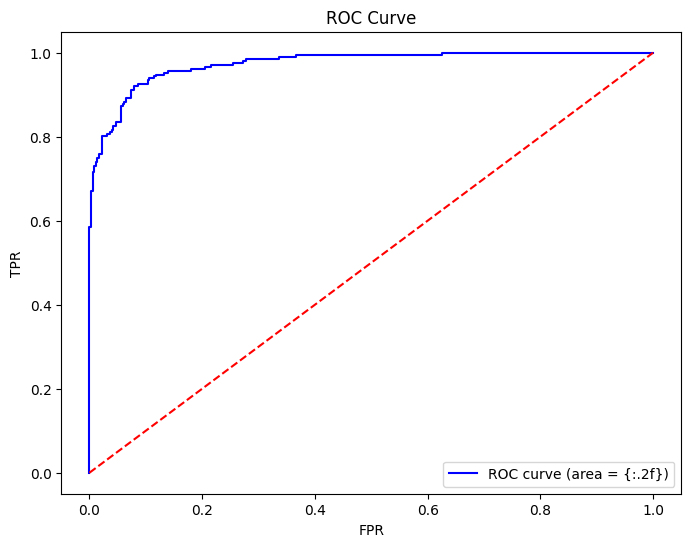

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 대각선 (무작위 예측)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

* ROC AUC 값

In [19]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.97412927435125
